# Import packages

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Upload the data into a DataFrame

Note : les donnees utilisees datent du 18.01.2024

In [2]:
DATA_RAW_PATH = Path('../data/raw/')
DATA_RAW_PATH.mkdir(parents=True, exist_ok=True)

with open(DATA_RAW_PATH / Path("rdg_corpus.json"), 'r') as f:
  content = json.load(f)

df = pd.DataFrame(content)

# Explorations

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49990 entries, 0 to 49989
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     49990 non-null  object 
 1   type                     49990 non-null  object 
 2   url                      49990 non-null  object 
 3   global_id                3662 non-null   object 
 4   description              28475 non-null  object 
 5   published_at             49990 non-null  object 
 6   publisher                3662 non-null   object 
 7   citationHtml             3662 non-null   object 
 8   identifier_of_dataverse  3662 non-null   object 
 9   name_of_dataverse        3662 non-null   object 
 10  citation                 3662 non-null   object 
 11  storageIdentifier        3662 non-null   object 
 12  subjects                 3662 non-null   object 
 13  fileCount                3662 non-null   float64
 14  versionId             

In [4]:
df['type'].value_counts()

type
file         45580
dataset       3662
dataverse      748
Name: count, dtype: int64

In [5]:
df.columns

Index(['name', 'type', 'url', 'global_id', 'description', 'published_at',
       'publisher', 'citationHtml', 'identifier_of_dataverse',
       'name_of_dataverse', 'citation', 'storageIdentifier', 'subjects',
       'fileCount', 'versionId', 'versionState', 'majorVersion',
       'minorVersion', 'createdAt', 'updatedAt', 'contacts', 'publications',
       'geographicCoverage', 'authors', 'file_id', 'file_type',
       'file_content_type', 'size_in_bytes', 'md5', 'checksum',
       'file_persistent_id', 'dataset_name', 'dataset_id',
       'dataset_persistent_id', 'dataset_citation', 'unf', 'keywords',
       'producers', 'dataSources', 'relatedMaterial', 'identifier'],
      dtype='object')

**columns they all have** : 'name', 'type', 'url', 'description'

 **only file have :** 'file_id', 'file_type', 'file_content_type' 'size_in_bytes', 'md5', 'checksum',   'file_persistent_id', 'dataset_name', 'dataset_id', 'dataset_persistent_id', 'dataset_citation'

**only dataset have :** 'global_id', 'publisher', 'citationHtml', 'identifier_of_dataverse', 'name_of_dataverse', 'citation', 'storageIdentifier', 'subjects', 'fileCount', 'versionId', 'versionState', 'createdAt', 'updatedAt', 'contacts', 'authors'

**only dataverse have :** 'identifier'

**mixed between the types (TBD) :**   'description', 'majorVersion', 'minorVersion', 'publications','geographicCoverage', 'unf', 'keywords', 'producers', 'dataSources', 'relatedMaterial',

# Description analysis

In [6]:
df_description = df[df['description'].notna()]

In [7]:
df_description['type'].value_counts()

type
file         24273
dataset       3662
dataverse      540
Name: count, dtype: int64

**All the datasets have a description**

In [8]:
df_description['descr_len'] = df_description['description'].str.len()

C:\Users\Anthony\AppData\Local\Temp\ipykernel_5680\3048656202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_description['descr_len'] = df_description['description'].str.len()


In [9]:
df_description['descr_len'].value_counts()

descr_len
0       16534
18        196
240       169
46        147
22        140
        ...  
884         1
1349        1
2573        1
1019        1
1674        1
Name: count, Length: 1691, dtype: int64

In [10]:
df_description_1 = df_description[df_description['descr_len'] != 0]

In [11]:
df_description_1['type'].value_counts()

type
file         7739
dataset      3662
dataverse     540
Name: count, dtype: int64

In [12]:
df_description_1['descr_len'].value_counts()

descr_len
18      196
240     169
46      147
22      140
7       127
       ... 
884       1
1349      1
2573      1
1019      1
1674      1
Name: count, Length: 1690, dtype: int64

In [13]:
df_description_1['descr_len'].describe()

count    11941.000000
mean       342.816850
std        717.204782
min          1.000000
25%         46.000000
50%        105.000000
75%        294.000000
max      12865.000000
Name: descr_len, dtype: float64

In [14]:
max_x = int(df_description_1['descr_len'].max())
# make a distribution of description lengths
fig = px.histogram(df_description_1, x='descr_len', nbins=max_x)
fig.show()

# cut X axis to 500
fig_cut = px.histogram(df_description_1, x='descr_len', nbins=max_x).update_xaxes(range=[0, 500])
# add mediane as vertical line
fig_cut.add_vline(x=df_description_1['descr_len'].median(), line_dash="dash", line_color="red")
fig_cut.show()

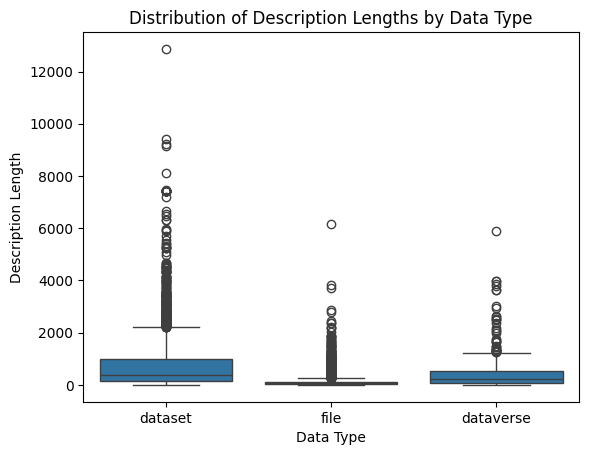

In [15]:
# Create a boxplot using Seaborn
sns.boxplot(x='type', y='descr_len', data=df_description_1)

plt.xlabel('Data Type')
plt.ylabel('Description Length')
plt.title('Distribution of Description Lengths by Data Type')
plt.show()

In [16]:
df_description_1['description']

0        Positive mode LC-MS metabolomic profiling of 1...
1                              List of annotated variables
2        48 negative mode LC-MS acquisitions of samples...
3        Data output from MSDIAL software with an addit...
4                        used parameters with MSDial v3.66
                               ...                        
49985    This dataset includes observations on soil org...
49986    This data on fonio highlighted that social fac...
49987    Plant (maize) and soil characteristics were mo...
49988    L'objectif de ce questionnaire est de cerner l...
49989    L'enquête "Travail décent, sentiment d’exploit...
Name: description, Length: 11941, dtype: object

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize  import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anthony\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anthony\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Tokenize and count words in each description
df_description_1["word_count"] = df_description_1['description'].apply(lambda x: len(word_tokenize(x)))

C:\Users\Anthony\AppData\Local\Temp\ipykernel_5680\3091102671.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
df_description_1['word_count'].describe()

count    11941.000000
mean        60.394774
std        129.423896
min          1.000000
25%          7.000000
50%         18.000000
75%         52.000000
max       2639.000000
Name: word_count, dtype: float64

In [20]:
# Plot the distribution of the number of words per description
max_x = int(df_description_1.word_count.max())
# limit to 500 words
fig = px.histogram(df_description_1, x='word_count', nbins=int(max_x)).update_xaxes(range=[0, 500])
# add median
fig.add_vline(x=df_description_1['word_count'].median(), line_dash="dash", line_color="red")
fig.show()

# Keywords analysis

In [24]:
# keep only datasets
datasets = df[df['type'] == 'dataset']
# replace NaN with empty string
datasets['keywords'] = datasets['keywords'].fillna('')
df_keywords = datasets

C:\Users\Anthony\AppData\Local\Temp\ipykernel_5680\3903145149.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
df_keywords["keywords"]

0                                                         
6                                                         
12                                                        
18                                                        
24                                                        
                               ...                        
49985    [Agricultural Sciences, Earth and Environmenta...
49986    [Agricultural Sciences, Social Sciences, Agrob...
49987    [Agricultural Sciences, Earth and Environmenta...
49988    [Social Sciences, POLICE-COMMUNITY RELATIONSHI...
49989    [Social Sciences, TRAVAIL ET EMPLOI, ATTITUDES...
Name: keywords, Length: 3662, dtype: object

The only documents with keywords are datasets.

In [28]:
df_keywords['keywords']

0                                                         
6                                                         
12                                                        
18                                                        
24                                                        
                               ...                        
49985    [Agricultural Sciences, Earth and Environmenta...
49986    [Agricultural Sciences, Social Sciences, Agrob...
49987    [Agricultural Sciences, Earth and Environmenta...
49988    [Social Sciences, POLICE-COMMUNITY RELATIONSHI...
49989    [Social Sciences, TRAVAIL ET EMPLOI, ATTITUDES...
Name: keywords, Length: 3662, dtype: object

In [29]:
# Explode the 'keywords' lists into separate rows
keywords_series = df_keywords['keywords'].explode()

# Count the occurrences of each keyword
keyword_counts = keywords_series.value_counts()


# Display the counts
print(keyword_counts)

keywords
                        1040
pollen                   651
archéologie              505
archaeology              505
Social Sciences          448
                        ... 
Hyperspectral images       1
wood (material)            1
Coniferae                  1
Protein content            1
vermicompost               1
Name: count, Length: 5875, dtype: int64


In [30]:
# Create a new column 'keyword_count' with the count of keywords per line
df_keywords['keyword_count'] = df_keywords['keywords'].apply(len)

# Display the DataFrame with the keyword counts
print(df_keywords[['keywords', 'keyword_count']])

                                                keywords  keyword_count
0                                                                     0
6                                                                     0
12                                                                    0
18                                                                    0
24                                                                    0
...                                                  ...            ...
49985  [Agricultural Sciences, Earth and Environmenta...              6
49986  [Agricultural Sciences, Social Sciences, Agrob...              7
49987  [Agricultural Sciences, Earth and Environmenta...              6
49988  [Social Sciences, POLICE-COMMUNITY RELATIONSHI...              4
49989  [Social Sciences, TRAVAIL ET EMPLOI, ATTITUDES...              3

[3662 rows x 2 columns]


C:\Users\Anthony\AppData\Local\Temp\ipykernel_5680\2390934609.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
df_keywords['keyword_count'].describe()

count    3662.000000
mean        4.514473
std         6.500367
min         0.000000
25%         0.000000
50%         2.000000
75%         6.000000
max       140.000000
Name: keyword_count, dtype: float64

In [37]:
# Plot the distribution of keyword counts
fig = px.histogram(df_keywords, x='keyword_count')
fig.show()

# Date analysis

In [39]:
df['published_at'] = pd.to_datetime(df['published_at'])

In [40]:
df['published_at']

0       2020-07-03 15:04:19+00:00
1       2020-07-03 15:04:19+00:00
2       2020-07-03 15:04:19+00:00
3       2020-07-03 15:04:19+00:00
4       2020-07-03 15:04:19+00:00
                   ...           
49985   2023-12-06 01:00:04+00:00
49986   2023-12-07 01:00:04+00:00
49987   2023-12-14 01:00:03+00:00
49988   2024-01-17 01:00:15+00:00
49989   2024-01-17 01:00:15+00:00
Name: published_at, Length: 49990, dtype: datetime64[ns, UTC]

In [41]:
df['year_month'] = df['published_at'].dt.to_period('M')

df['year'] = df['published_at'].dt.year

C:\Users\Anthony\AppData\Local\Temp\ipykernel_5680\4035253343.py:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [42]:
df.groupby(df['year'])['description'].count()

year
2018      435
2019      669
2020     1770
2021     3660
2022     8039
2023    13653
2024      249
Name: description, dtype: int64

In [43]:
df.groupby(df['year'])['name'].count()

year
2018      939
2019     4363
2020     4087
2021     8482
2022    12163
2023    18849
2024     1107
Name: name, dtype: int64

In [44]:
filtered_df = df[df['type'] == 'dataset']

# Perform groupby and count the unique names
result = filtered_df.groupby('year')['name'].count()
result

year
2018      64
2019     145
2020     309
2021     745
2022     744
2023    1591
2024      64
Name: name, dtype: int64

In [45]:
df_description_1['published_at'] = pd.to_datetime(df_description_1['published_at'])

C:\Users\Anthony\AppData\Local\Temp\ipykernel_5680\2372842973.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
df_description_1['year'] = df_description_1['published_at'].dt.year

C:\Users\Anthony\AppData\Local\Temp\ipykernel_5680\4056641404.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
filtered_df_descr = df_description_1[df_description_1['type'] == 'dataset']

# Perform groupby and count the unique names
result2 = filtered_df_descr.groupby('year')['name'].count()
result2

year
2018      64
2019     145
2020     309
2021     745
2022     744
2023    1591
2024      64
Name: name, dtype: int64

In [48]:
descr_year_type = df_description_1.groupby(['year', 'type'])['description'].nunique()

In [49]:
general_year_type = df.groupby(['year', 'type'])['name'].nunique()

In [50]:
df_year_type = pd.DataFrame(general_year_type)

In [51]:
df_desc_y_t = pd.DataFrame(descr_year_type)

In [52]:
df_year_type['with_description'] = df_desc_y_t['description']

In [53]:
df_year_type['description_score'] =  (df_year_type['with_description'] / df_year_type['name'])*100

In [54]:
df_year_type

name  with_description  description_score
year type                                                 
2018 dataset       64                59          92.187500
     dataverse     67                70         104.477612
     file         796               103          12.939698
2019 dataset      145               145         100.000000
     dataverse     26                21          80.769231
     file        4156               376           9.047161
2020 dataset      309               280          90.614887
     dataverse     68                46          67.647059
     file        3577               671          18.758736
2021 dataset      743               741          99.730821
     dataverse     67                39          58.208955
     file        5374              1349          25.102345
2022 dataset      743               741          99.730821
     dataverse    201               113          56.218905
     file       10980              1451          13.214936
2023 dataset     1586              1539          97.036570
     dataverse    281               218          77.580071
     file       16129              2328          14.433629
2024 dataset       64                64         100.000000
     dataverse     23                23         100.000000
     file        1019                68           6.673209

In [55]:
df_keywords['published_at'] = pd.to_datetime(df_keywords['published_at'])

C:\Users\Anthony\AppData\Local\Temp\ipykernel_5680\3671930499.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
df_keywords['year'] = df_keywords['published_at'].dt.year

C:\Users\Anthony\AppData\Local\Temp\ipykernel_5680\2508860196.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
df_keywords = pd.DataFrame(df_keywords)

In [58]:
keywords_year_type = df_keywords.groupby(['year', 'type'])['keywords'].count()

In [59]:
df_kw_y_t = pd.DataFrame(keywords_year_type)

In [60]:
df_year_type['with_keywords'] = df_kw_y_t['keywords']

In [61]:
df_year_type['keywords_score'] = (df_year_type['with_keywords'] / df_year_type['name'] ) * 100

In [62]:
df_year_type

name  with_description  description_score  with_keywords  \
year type                                                                   
2018 dataset       64                59          92.187500           64.0   
     dataverse     67                70         104.477612            NaN   
     file         796               103          12.939698            NaN   
2019 dataset      145               145         100.000000          145.0   
     dataverse     26                21          80.769231            NaN   
     file        4156               376           9.047161            NaN   
2020 dataset      309               280          90.614887          309.0   
     dataverse     68                46          67.647059            NaN   
     file        3577               671          18.758736            NaN   
2021 dataset      743               741          99.730821          745.0   
     dataverse     67                39          58.208955            NaN   
     file        5374              1349          25.102345            NaN   
2022 dataset      743               741          99.730821          744.0   
     dataverse    201               113          56.218905            NaN   
     file       10980              1451          13.214936            NaN   
2023 dataset     1586              1539          97.036570         1591.0   
     dataverse    281               218          77.580071            NaN   
     file       16129              2328          14.433629            NaN   
2024 dataset       64                64         100.000000           64.0   
     dataverse     23                23         100.000000            NaN   
     file        1019                68           6.673209            NaN   

                keywords_score  
year type                       
2018 dataset        100.000000  
     dataverse             NaN  
     file                  NaN  
2019 dataset        100.000000  
     dataverse             NaN  
     file                  NaN  
2020 dataset        100.000000  
     dataverse             NaN  
     file                  NaN  
2021 dataset        100.269179  
     dataverse             NaN  
     file                  NaN  
2022 dataset        100.134590  
     dataverse             NaN  
     file                  NaN  
2023 dataset        100.315259  
     dataverse             NaN  
     file                  NaN  
2024 dataset        100.000000  
     dataverse             NaN  
     file                  NaN

In [63]:
df_year_type['score'] = (df_year_type['description_score'] + df_year_type['keywords_score'])/2

In [64]:
df_year_type

name  with_description  description_score  with_keywords  \
year type                                                                   
2018 dataset       64                59          92.187500           64.0   
     dataverse     67                70         104.477612            NaN   
     file         796               103          12.939698            NaN   
2019 dataset      145               145         100.000000          145.0   
     dataverse     26                21          80.769231            NaN   
     file        4156               376           9.047161            NaN   
2020 dataset      309               280          90.614887          309.0   
     dataverse     68                46          67.647059            NaN   
     file        3577               671          18.758736            NaN   
2021 dataset      743               741          99.730821          745.0   
     dataverse     67                39          58.208955            NaN   
     file        5374              1349          25.102345            NaN   
2022 dataset      743               741          99.730821          744.0   
     dataverse    201               113          56.218905            NaN   
     file       10980              1451          13.214936            NaN   
2023 dataset     1586              1539          97.036570         1591.0   
     dataverse    281               218          77.580071            NaN   
     file       16129              2328          14.433629            NaN   
2024 dataset       64                64         100.000000           64.0   
     dataverse     23                23         100.000000            NaN   
     file        1019                68           6.673209            NaN   

                keywords_score       score  
year type                                   
2018 dataset        100.000000   96.093750  
     dataverse             NaN         NaN  
     file                  NaN         NaN  
2019 dataset        100.000000  100.000000  
     dataverse             NaN         NaN  
     file                  NaN         NaN  
2020 dataset        100.000000   95.307443  
     dataverse             NaN         NaN  
     file                  NaN         NaN  
2021 dataset        100.269179  100.000000  
     dataverse             NaN         NaN  
     file                  NaN         NaN  
2022 dataset        100.134590   99.932705  
     dataverse             NaN         NaN  
     file                  NaN         NaN  
2023 dataset        100.315259   98.675914  
     dataverse             NaN         NaN  
     file                  NaN         NaN  
2024 dataset        100.000000  100.000000  
     dataverse             NaN         NaN  
     file                  NaN         NaN

# Separation descriptions francais et anglais

In [65]:
!pip install langid

                                              0.0/1.9 MB ? eta -:--:--
     --                                       0.1/1.9 MB 6.8 MB/s eta 0:00:01
     --------                                 0.4/1.9 MB 4.9 MB/s eta 0:00:01
     ---------------------------              1.3/1.9 MB 10.4 MB/s eta 0:00:01
     ---------------------------------------- 1.9/1.9 MB 13.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941180 sha256=f88ba215ae658a8c12051241f76fe34d12cb2834743f1c1fc2fbd0290747edf1
  Stored in directory: c:\users\anthony\appdata\local\pip\cache\wheels\32\6a\b6\b7eb43a6ad55b139c15c5daa29f3707659cfa6944d3c696f5b
Su


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
import langid


# Function to detect language
def detect_language(text):
    return langid.classify(text)[0]

# Apply language detection and split descriptions
df_description_1['language'] = df_description_1['description'].apply(detect_language)
df_description_1['description_fr'] = df_description_1[df_description_1['language'] == 'fr']['description']
df_description_1['description_en'] = df_description_1[df_description_1['language'] == 'en']['description']

# Drop the 'language' column if needed
#df.drop('language', axis=1, inplace=True)

# Display the DataFrame
print(df_description_1)

                                                    name     type  \
0      Positive mode LC-MS metabolomics of tomato fru...  dataset   
1             MET-2018-P13-CM_LCMS_annotation_table.xlsx     file   
2                       MET-2018-P13-CM_LCMS_pos_data.7z     file   
3      MET-2018-P13-CM_LCMS_pos_DWnorm_MSDIAL_output_...     file   
4      MET-2018-P13-CM_LCMS_pos_MSDIAL_Parameters_4_2...     file   
...                                                  ...      ...   
49985  Data on soil organic carbon content and stock ...  dataset   
49986  Supplementary data for: Ethnolinguistic and ge...  dataset   
49987  Dataset collected during a 70 day column exper...  dataset   
49988  Expériences et perception des forces de l'ordr...  dataset   
49989  Travail décent, sentiment d’exploitation, comp...  dataset   

                                                     url  \
0                        https://doi.org/10.15454/IFPJAP   
1      https://entrepot.recherche.data.gouv.fr/api/

C:\Users\Anthony\AppData\Local\Temp\ipykernel_5680\3848091412.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Anthony\AppData\Local\Temp\ipykernel_5680\3848091412.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Anthony\AppData\Local\Temp\ipykernel_5680\3848091412.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [67]:
df_description_1['language'].value_counts()

language
en    8941
fr    2323
la     137
es      93
nl      86
de      81
mt      53
it      51
da      50
pt      18
ca      15
no      13
ms       9
eo       9
nn       7
bs       6
et       5
lt       4
lv       4
ro       4
pl       4
fi       3
hu       3
hr       2
eu       2
sv       2
cy       2
id       2
gl       2
tr       1
mg       1
rw       1
sl       1
is       1
af       1
tl       1
lb       1
he       1
ku       1
Name: count, dtype: int64

In [68]:
df_descr_fr = df_description_1[df_description_1['language'] == 'fr']

In [69]:
df_descr_en = df_description_1[df_description_1['language'] == 'en']

# BERTopic

## Installation de BERTopic

In [70]:
%%capture
!pip install bertopic

## Descriptions en Français

### Entrainement

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(language="multilingual", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df_descr_fr['description'])

2024-02-19 15:27:05,586 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/73 [00:00<?, ?it/s]

2024-02-19 15:27:22,308 - BERTopic - Embedding - Completed ✓
2024-02-19 15:27:22,309 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-19 15:27:40,621 - BERTopic - Dimensionality - Completed ✓
2024-02-19 15:27:40,624 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-19 15:27:41,154 - BERTopic - Cluster - Completed ✓
2024-02-19 15:27:41,160 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-19 15:27:41,545 - BERTopic - Representation - Completed ✓


In [ ]:
freq = topic_model.get_topic_info(); freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,592,-1_de_la_et_des,"[de, la, et, des, les, le, the, du, en, of]","[En 1985, Michael Pollak initie un programme d..."
1,0,134,0_recherche_université_et_de,"[recherche, université, et, de, data, research...",[Bienvenue sur l'espace Recherche Data Gouv dé...
2,1,81,1_sols_des_et_de,"[sols, des, et, de, sol, les, la, sur, ru, du]",[Nous présentons ici les estimations spatialis...
3,2,77,2_ha_crop_données_cultures,"[ha, crop, données, cultures, culture, espèces...",[Ce modèle est défini pour la base de données ...
4,3,73,3_base_corpus_description_données,"[base, corpus, description, données, dataset, ...",[Description des différents fichiers de la bas...
...,...,...,...,...,...
57,56,12,56_appli_fichier_shapefile_styles,"[appli, fichier, shapefile, styles, qgis, couc...","[Fichier de styles de couches QGIS, Fichier de..."
58,57,11,57_palynological_samples_radiocarbon_site,"[palynological, samples, radiocarbon, site, da...",[Natural site; lacustrine drilling. 153 palyno...
59,58,11,58_csv_fichier_format_odam,"[csv, fichier, format, odam, tsv, brutes, file...","[Fichier .csv, Fichier .csv, Fichier .csv]"
60,59,11,59_organique_scénario_sol_carbone,"[organique, scénario, sol, carbone, médiane, s...",[Sorties STICS avec changement climatique (scé...


In [ ]:
topic_model.get_topic(0)

[('recherche', 0.030750782644262495),
 ('université', 0.02426450134569451),
 ('et', 0.02042192306021811),
 ('de', 0.019486328617872598),
 ('data', 0.018276190621197622),
 ('research', 0.017061783492881434),
 ('rennes', 0.0160498714284249),
 ('fr', 0.014325172661360155),
 ('données', 0.01426637833449798),
 ('cnrs', 0.013673254203764107)]

In [ ]:
topic_model.topics_[:10]

[0, 2, 54, -1, 4, -1, -1, 45, 10, 10]

### Visualisations

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=50)

### Fine-Tuning des paramètres

In [ ]:
#je n'arrive pas a faire une reduction des outliers

In [ ]:
# Update the internal topic representation of the topics
topic_model.update_topics(df_descr_fr['description'], topics)
freq = topic_model.get_topic_info(); freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,592,-1_de_la_et_des,"[de, la, et, des, les, le, the, du, en, of]","[En 1985, Michael Pollak initie un programme d..."
1,0,134,0_recherche_université_et_de,"[recherche, université, et, de, data, research...",[Bienvenue sur l'espace Recherche Data Gouv dé...
2,1,81,1_sols_des_et_de,"[sols, des, et, de, sol, les, la, sur, ru, du]",[Nous présentons ici les estimations spatialis...
3,2,77,2_ha_crop_données_cultures,"[ha, crop, données, cultures, culture, espèces...",[Ce modèle est défini pour la base de données ...
4,3,73,3_base_corpus_description_données,"[base, corpus, description, données, dataset, ...",[Description des différents fichiers de la bas...
...,...,...,...,...,...
57,56,12,56_appli_fichier_shapefile_styles,"[appli, fichier, shapefile, styles, qgis, couc...","[Fichier de styles de couches QGIS, Fichier de..."
58,57,11,57_palynological_samples_radiocarbon_site,"[palynological, samples, radiocarbon, site, da...",[Natural site; lacustrine drilling. 153 palyno...
59,58,11,58_csv_fichier_format_odam,"[csv, fichier, format, odam, tsv, brutes, file...","[Fichier .csv, Fichier .csv, Fichier .csv]"
60,59,11,59_organique_scénario_sol_carbone,"[organique, scénario, sol, carbone, médiane, s...",[Sorties STICS avec changement climatique (scé...


In [ ]:
topic_model.reduce_topics(df_descr_fr['description'], nr_topics=40)

2024-02-19 15:27:44,647 - BERTopic - Topic reduction - Reducing number of topics
2024-02-19 15:27:45,058 - BERTopic - Topic reduction - Reduced number of topics from 62 to 40


In [ ]:
freq = topic_model.get_topic_info()
freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,592,-1_de_la_et_des,"[de, la, et, des, les, le, the, du, of, en]","[En 1985, Michael Pollak initie un programme d..."
1,0,222,0_de_des_et_la,"[de, des, et, la, les, en, sur, une, le, du]",[La qualité écologique des milieux aquatiques ...
2,1,200,1_rpg_complété_ign_vectorielles,"[rpg, complété, ign, vectorielles, cesbio, odr...",[RPG complété 2019. Complète le RPG campagne 2...
3,2,188,2_recherche_de_et_université,"[recherche, de, et, université, data, des, res...",[Bienvenue sur l'espace Recherche Data Gouv dé...
4,3,115,3_résultats_tour_élections_par,"[résultats, tour, élections, par, 1er, 2e, cir...",[Les résultats du 1er tour des élections légis...
5,4,92,4_ha_crop_cultures_données,"[ha, crop, cultures, données, de, pour, cultur...",[Ce modèle est défini pour la base de données ...
6,5,73,5_base_données_corpus_description,"[base, données, corpus, description, dataset, ...",[Description des différents fichiers de la bas...
7,6,73,6_cross_section_data_,"[cross, section, data, , , , , , , ]","[Cross section data, Cross section data, Cross..."
8,7,52,7_electoral_the_of_elections,"[electoral, the, of, elections, électorales, p...",[La majeure partie des connaissances produites...
9,8,50,8_simulations_site_résultats_simulation,"[simulations, site, résultats, simulation, des...","[Résultats des simulations du site 3, Résultat..."


In [ ]:
freq.head(5)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,592,-1_de_la_et_des,"[de, la, et, des, les, le, the, du, of, en]","[En 1985, Michael Pollak initie un programme d..."
1,0,222,0_de_des_et_la,"[de, des, et, la, les, en, sur, une, le, du]",[La qualité écologique des milieux aquatiques ...
2,1,200,1_rpg_complété_ign_vectorielles,"[rpg, complété, ign, vectorielles, cesbio, odr...",[RPG complété 2019. Complète le RPG campagne 2...
3,2,188,2_recherche_de_et_université,"[recherche, de, et, université, data, des, res...",[Bienvenue sur l'espace Recherche Data Gouv dé...
4,3,115,3_résultats_tour_élections_par,"[résultats, tour, élections, par, 1er, 2e, cir...",[Les résultats du 1er tour des élections légis...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stop_words = stopwords.words()
vectorizer_model = CountVectorizer(stop_words=stop_words)

topic_model.update_topics(df_descr_fr['description'], vectorizer_model=vectorizer_model)

In [ ]:
freq = topic_model.get_topic_info(); freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,592,-1_données_police_questionnaire_cette,"[données, police, questionnaire, cette, enquêt...","[En 1985, Michael Pollak initie un programme d..."
1,0,222,0_données_eau_sol_cette,"[données, eau, sol, cette, projet, enquête, an...",[La qualité écologique des milieux aquatiques ...
2,1,200,1_rpg_complété_ign_vectorielles,"[rpg, complété, ign, vectorielles, cesbio, odr...",[RPG complété 2019. Complète le RPG campagne 2...
3,2,188,2_recherche_université_data_research,"[recherche, université, data, research, rennes...",[Bienvenue sur l'espace Recherche Data Gouv dé...
4,3,115,3_tour_résultats_élections_1er,"[tour, résultats, élections, 1er, 2e, circonsc...",[Les résultats du 1er tour des élections légis...
5,4,92,4_crop_cultures_données_culture,"[crop, cultures, données, culture, espèces, ye...",[Ce modèle est défini pour la base de données ...
6,5,73,5_base_corpus_description_données,"[base, corpus, description, données, dataset, ...",[Description des différents fichiers de la bas...
7,6,73,6_cross_section_data_,"[cross, section, data, , , , , , , ]","[Cross section data, Cross section data, Cross..."
8,7,52,7_electoral_électorales_elections_political,"[electoral, électorales, elections, political,...",[La majeure partie des connaissances produites...
9,8,50,8_simulations_site_résultats_simulation,"[simulations, site, résultats, simulation, sti...","[Résultats des simulations du site 3, Résultat..."


## Descriptions en anglais

In [ ]:
topics_en, probs_en = topic_model.fit_transform(df_descr_en['description'])

2024-02-19 15:27:45,966 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/280 [00:00<?, ?it/s]

2024-02-19 15:28:01,722 - BERTopic - Embedding - Completed ✓
2024-02-19 15:28:01,725 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-19 15:28:51,243 - BERTopic - Dimensionality - Completed ✓
2024-02-19 15:28:51,245 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-19 15:29:33,908 - BERTopic - Cluster - Completed ✓
2024-02-19 15:29:33,913 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-19 15:29:35,385 - BERTopic - Representation - Completed ✓
2024-02-19 15:29:35,390 - BERTopic - Topic reduction - Reducing number of topics
2024-02-19 15:29:36,067 - BERTopic - Topic reduction - Reduced number of topics from 263 to 40


In [ ]:
freq_en = topic_model.get_topic_info(); freq_en

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2310,-1_data_dataset_file_soil,"[data, dataset, file, soil, species, number, c...","[Data used , DATA COLLATION AND HARMONISATION ..."
1,0,1320,0_tree_number_format_trees,"[tree, number, format, trees, data, species, d...",[Egg laying dynamics in Experiment 2. **Used f...
2,1,1133,1_script_data_tsv_table,"[script, data, tsv, table, format, values, fig...","[This script takes as input ""pheno-diallel_wit..."
3,2,454,2_soil_temperature_water_data,"[soil, temperature, water, data, land, river, ...",[This dataset has been collected thanks to the...
4,3,344,3_milk_replicate_ultrafiltrate_cirm,"[milk, replicate, ultrafiltrate, cirm, fish, m...",[Proteome of lactobacillus delbrueckii subsp b...
5,4,315,4_food_indicators_spreadsheets_research,"[food, indicators, spreadsheets, research, que...",[The text file corresponds to the search query...
6,5,295,5_cows_dairy_days_dataset,"[cows, dairy, days, dataset, diet, animal, pig...",[This dataset 4 contains data for 28 cows the ...
7,6,292,6_lignin_nmr_spectrum_sample,"[lignin, nmr, spectrum, sample, organosolv, fi...",[This table presents the results of the cytoto...
8,7,292,7_pictures_cell_trypsine_beads,"[pictures, cell, trypsine, beads, addition, ce...",[Cell 3 beads pictures after trypsine addition...
9,8,271,8_palynological_samples_archaeological_site,"[palynological, samples, archaeological, site,...",[Archaeological site. Lake dwelling. 2 palynol...


In [ ]:
# Reduce outliers
#topics = topic_model.reduce_outliers(df_descr_en['description'], topics)

In [ ]:
topic_model.update_topics(df_descr_en['description'], vectorizer_model=vectorizer_model)

In [ ]:
freq = topic_model.get_topic_info(); freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2310,-1_data_dataset_file_soil,"[data, dataset, file, soil, species, number, c...","[Data used , DATA COLLATION AND HARMONISATION ..."
1,0,1320,0_tree_number_format_trees,"[tree, number, format, trees, data, species, d...",[Egg laying dynamics in Experiment 2. **Used f...
2,1,1133,1_script_data_tsv_table,"[script, data, tsv, table, format, values, fig...","[This script takes as input ""pheno-diallel_wit..."
3,2,454,2_soil_temperature_water_data,"[soil, temperature, water, data, land, river, ...",[This dataset has been collected thanks to the...
4,3,344,3_milk_replicate_ultrafiltrate_cirm,"[milk, replicate, ultrafiltrate, cirm, fish, m...",[Proteome of lactobacillus delbrueckii subsp b...
5,4,315,4_food_indicators_spreadsheets_research,"[food, indicators, spreadsheets, research, que...",[The text file corresponds to the search query...
6,5,295,5_cows_dairy_days_dataset,"[cows, dairy, days, dataset, diet, animal, pig...",[This dataset 4 contains data for 28 cows the ...
7,6,292,6_lignin_nmr_spectrum_sample,"[lignin, nmr, spectrum, sample, organosolv, fi...",[This table presents the results of the cytoto...
8,7,292,7_pictures_cell_trypsine_beads,"[pictures, cell, trypsine, beads, addition, ce...",[Cell 3 beads pictures after trypsine addition...
9,8,271,8_palynological_samples_archaeological_site,"[palynological, samples, archaeological, site,...",[Archaeological site. Lake dwelling. 2 palynol...
